<a href="https://colab.research.google.com/github/ertush/Startups_Ongoza_DataScience/blob/master/Ongoza_Data_Science_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis (EDA)

## Uploading dataset form google drive

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 18.0MB/s 


In [0]:
# list files from root of google drive
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

In [0]:
# Get id of the desired file "data.csv"
data_downloaded = drive.CreateFile({'id': '1FBIg_-aFMQpnDX9vk86-IDCSxlD_6voU'})
data_downloaded.GetContentFile('data.csv')

In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')

# Describing the data
data.head()

,application_year,selected,showup,finished,info_venture_country,info_venture_country_hq,venture region,info_has_website,info_founding_year,info_legal_status,...,found_name3_gender,found_name1_born,found_name2_born,found_name3_born,found_name1_resides,found_name2_resides,found_name3_resides,found_name1_education,found_name2_education,found_name3_education
0,2016,1.0,1.0,1.0,Rwanda,Rwanda,Sub-Saharan Africa,1,2015.0,For-profit company,...,NaN,Rwanda,NaN,NaN,Rwanda,NaN,NaN,Associate Degree,NaN,NaN
1,2015,NaN,NaN,0.0,Kenya,Kenya,Sub-Saharan Africa,1,2013.0,For-profit company,...,NaN,Kenya,Kenya,NaN,Kenya,Kenya,NaN,High school,High school,NaN
2,2014,NaN,NaN,0.0,India,India,South Asia,1,2013.0,For-profit company,...,M,India,India,India,India,India,India,NaN,NaN,NaN
3,2016,0.0,NaN,NaN,Mexico,Mexico,Latin America & Caribbean,0,2015.0,For-profit company,...,F,Mexico,Mexico,Mexico,Mexico,Mexico,Mexico,High school,High school,High school
4,2016,0.0,0.0,0.0,Rwanda,Rwanda,Sub-Saharan Africa,0,2015.0,For-profit company,...,F,Rwanda,Rwanda,Rwanda,Rwanda,Rwanda,Rwanda,Bachelors degree / Honours degree,Bachelors degree / Honours degree,Bachelors degree / Honours degree


In [6]:
#Shape of the dataset
data.shape

(1856, 38)

In [7]:
#profiling  data
import pandas_profiling

pandas_profiling.ProfileReport(data)


Number of variables,38
Number of observations,1856
Total Missing (%),12.3%
Total size in memory,551.1 KiB
Average record size in memory,304.0 B
Numeric,15
Categorical,18
Boolean,1
Date,0
Text (Unique),0
Rejected,4


In [0]:
#get all the unique valueds in first 5 columns
#data.info_legal_status.unique()

[data[col].unique() for col in data.head()]



In [9]:
%matplotlib inline
# importing necessary libraries for working with data
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for creating beautiful plots
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = (10,15)

data.groupby(data.head().info_venture_country).application_year.mean()


info_venture_country
India     2014
Kenya     2015
Mexico    2016
Rwanda    2016
Name: application_year, dtype: int64

In [10]:
# Drop all columns where found_name_education info_venture_country are missing

col_names = []

[col_names.append(col) for col in data[:0]]

# dropping all the columns with null
data.dropna(subset=col_names, inplace=True)

data.shape


(389, 38)

In [11]:
# fetch data where selected is true and venture country is kenya
# This was just out of curosity of knowing how Kenya faired. It helps nothing in EDA

data[(data.selected == 1) & (data.info_venture_country == "Kenya")].shape

(13, 38)

In [12]:
# Creating a save point in google drive

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!mkdir /content/gdrive/My\ Drive/Ongoza\ Data\ Science\ Findings 

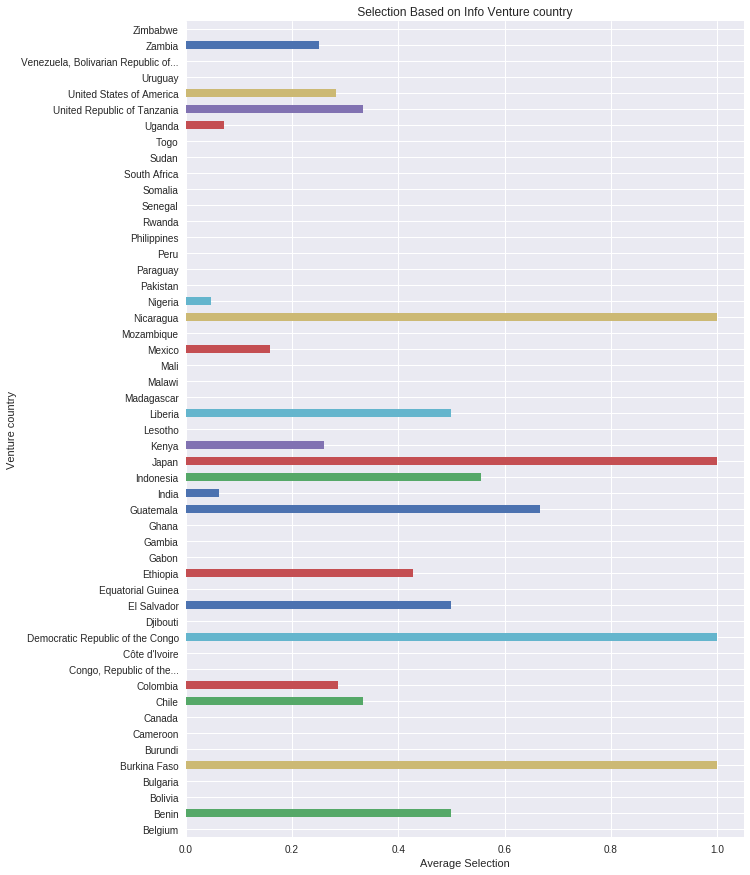

In [13]:
#info venture country by selection mean bar graph

figure = data.groupby(data.info_venture_country).selected.mean().plot(kind="barh")

plt.xlabel('Average Selection')
plt.ylabel('Venture country')
plt.title(' Selection Based on Info Venture country ')

#saving plot
path = "/content/gdrive/My Drive/Ongoza Data Science Findings/selection_mean_by_info_venture_country.pdf"
plt.savefig(path, format='pdf')

In [17]:
# Checking if all the files have been saved on google drive save point
!ls /content/gdrive/My\ Drive/Ongoza\ Data\ Science\ Findings

pandas_profiling_after_dropingna_columns.html
pandas_profiling_after_dropingna_columns.pdf
selection_mean_by_info_venture_country.pdf
selection_mean_by_venture_region.pdf
startups_finished_based_on_edu_levels.pdf


## Findings

 From what we can see from the graph it is clear that:
 >* Japan, Nicaragua, DRC Congo and Bukina Faso were the choice of most startups
 >* Countries like Canada, Cameroon, Burundi, Djibouti etc happen to have the lowest acceptance by the startups

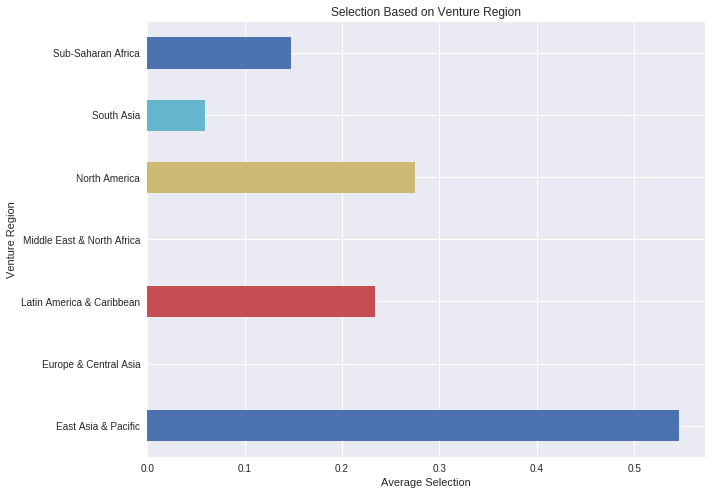

In [18]:
plt.rcParams["figure.figsize"] = (10,8)

#info venture regin by  selection mean bar graph

figure = data.groupby(data["venture region"]).selected.mean().plot(kind="barh")

plt.xlabel('Average Selection')
plt.ylabel('Venture Region')
plt.title('Selection Based on Venture Region')

path_f = "/content/gdrive/My Drive/Ongoza Data Science Findings/selection_mean_by_venture_region.pdf"
plt.savefig(path_f, format='pdf')

## Findings
Alot of startups that were selected ventured in parts of asia and North America. Probably because of the ease of acquring venture capital in those regions or the low cost of production

In [19]:
found_name1_2 = data.found_name1_resides == data.found_name2_resides
found_name1_3 = data.found_name1_resides == data.found_name3_resides
found_name2_3 = data.found_name2_resides == data.found_name3_resides

data[(found_name1_2) & (found_name1_3) & (found_name2_3)].head()

,application_year,selected,showup,finished,info_venture_country,info_venture_country_hq,venture region,info_has_website,info_founding_year,info_legal_status,...,found_name3_gender,found_name1_born,found_name2_born,found_name3_born,found_name1_resides,found_name2_resides,found_name3_resides,found_name1_education,found_name2_education,found_name3_education
4,2016,0.0,0.0,0.0,Rwanda,Rwanda,Sub-Saharan Africa,0,2015.0,For-profit company,...,F,Rwanda,Rwanda,Rwanda,Rwanda,Rwanda,Rwanda,Bachelors degree / Honours degree,Bachelors degree / Honours degree,Bachelors degree / Honours degree
11,2016,0.0,0.0,0.0,Uganda,Uganda,Sub-Saharan Africa,0,2015.0,For-profit company,...,F,Democratic Republic of the Congo,Democratic Republic of the Congo,Democratic Republic of the Congo,Uganda,Uganda,Uganda,Technical/Vocational degree,Technical/Vocational degree,High school
14,2016,0.0,0.0,0.0,Nigeria,Nigeria,Sub-Saharan Africa,1,2015.0,For-profit company,...,M,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Nigeria,Bachelors degree / Honours degree,Bachelors degree / Honours degree,Technical/Vocational degree
15,2016,0.0,0.0,0.0,Benin,Benin,Sub-Saharan Africa,0,2014.0,For-profit company,...,F,Benin,Benin,Benin,Benin,Benin,Benin,Bachelors degree / Honours degree,Bachelors degree / Honours degree,High school
18,2016,0.0,0.0,0.0,United States of America,United States of America,North America,1,2014.0,For-profit company,...,M,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,Bachelors degree / Honours degree,Bachelors degree / Honours degree,Associate Degree


##FIndings
* This shows that majority of staturtups had founder's 1, 2 and 3 coming from the same country

In [0]:
# profiling data after droping all null columns

pfr = pandas_profiling.ProfileReport(data)
pfr.to_file("/content/gdrive/My Drive/Ongoza Data Science Findings/pandas_profiling_after_dropingna_columns.pdf")



* There seem not to be a lot of change even after droping all the null columns 

In [54]:
# checking if files have been saved
!ls /content/gdrive/My\ Drive/Ongoza\ Data\ Science\ Findings/

pandas_profiling_after_dropingna_columns.html
pandas_profiling_after_dropingna_columns.pdf
selection_mean_by_info_venture_country.pdf
selection_mean_by_venture_region.pdf
startups_finished_based_on_edu_levels.pdf
startups_finished_based_on_year_founding.pdf


In [0]:
#calculating the Numbers of starups finished based on level of education of 1st founder.

finished_n_bachelors = len(data[(data.finished == 1) & data.found_name1_education.str.contains('Bachelors degree*', na = False)])
not_finished_n_bachelors = len(data[(data.finished == 0) & data.found_name1_education.str.contains('Bachelors degree*', na = False)])
finished_n_technical_voc = len(data[(data.finished == 1) & data.found_name1_education.str.contains('Technical*', na = False)])
not_finished_n_technical_voc = len(data[(data.finished == 0) & data.found_name1_education.str.contains('Technical*', na = False)])
finished_n_highschool = len(data[(data.finished == 1) & data.found_name1_education.str.contains('High*', na = False)])
not_finished_n_highschool = len(data[(data.finished == 0) & data.found_name1_education.str.contains('High*', na = False)])
finished_n_associate_deg = len(data[(data.finished == 1) & data.found_name1_education.str.contains('Associate*', na = False)])
not_finished_n_associate_deg = len(data[(data.finished == 0) & data.found_name1_education.str.contains('Associate*', na = False)])


In [0]:
finished = [finished_n_bachelors, finished_n_technical_voc, finished_n_highschool, finished_n_associate_deg]
not_finished = [not_finished_n_bachelors, not_finished_n_technical_voc, not_finished_n_highschool, not_finished_n_associate_deg]

def transform_to_series(data_ar, labels_ar):
  sr = pd.Series(data_ar, labels_ar)
  return sr

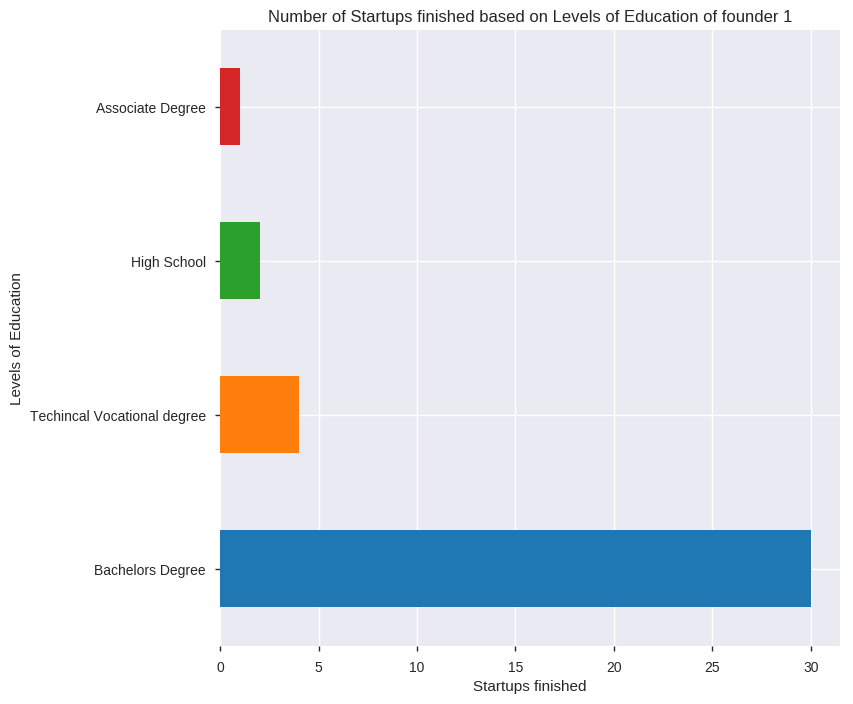

In [49]:
#plot based on level of education  of first founder and whether or not the startup finished
plt.rcParams["figure.figsize"] = (8,8)

plt.xlabel("Startups finished")
plt.ylabel("Levels of Education")
plt.title("Number of Startups finished based on Levels of Education of founder 1")
lvls_edu =  ["Bachelors Degree", "Techincal Vocational degree", "High School", "Associate Degree"];

transform_to_series(finished, lvls_edu).plot(kind="barh")

path = "/content/gdrive/My Drive/Ongoza Data Science Findings/startups_finished_based_on_edu_levels.pdf"
plt.savefig(path, format='pdf')

##FIndings 
>* This clearly shows that the founders of the startups who had reached the bachelors level of education were the most successful in the program as they recorded the highest number of startups that finished.

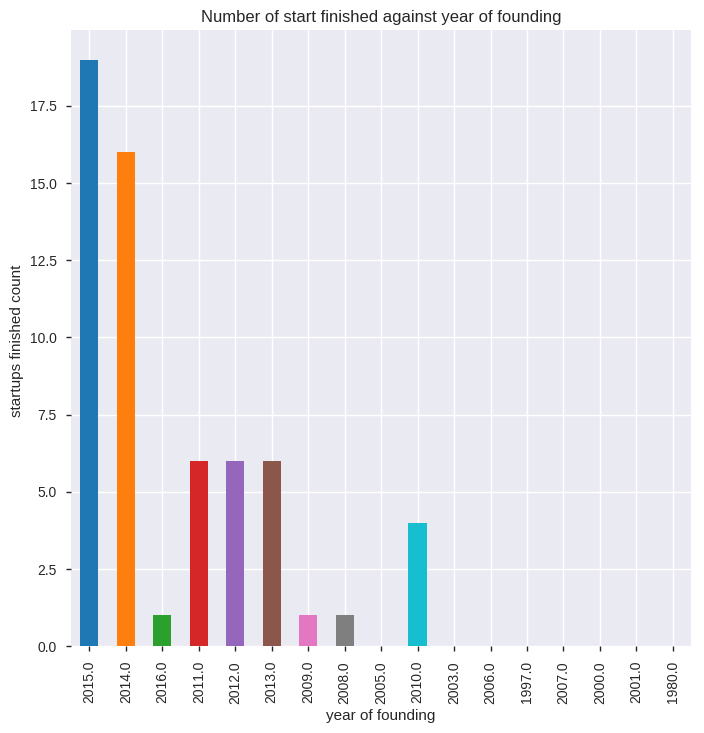

In [53]:
#Startups finishing base on founding year

data.info_founding_year.mode()
years = data.info_founding_year.unique()

finished_on_year_cnt = []
[finished_on_year_cnt.append(len(data[(data.info_founding_year == year) & (data.finished == 1)])) for year in years]

pd_series = transform_to_series(finished_on_year_cnt, years)

plt.xlabel("year of founding")
plt.ylabel("startups finished count ")
plt.title("Number of start finished against year of founding")

pd_series.plot(kind="bar")

path = "/content/gdrive/My Drive/Ongoza Data Science Findings/startups_finished_based_on_year_founding.pdf"
plt.savefig(path, format='pdf')

##Findngs 
>* The founding year for most startups was 2015
>* And alot of startups that were founded in 2015 finished (19)

##Insights
From the above findings several insights can be drawn, and they are as follows:
>* The Level of education is a crucial factor that was critical in determining which startups were going to make it through in the accelerator program.
>* All the three founders of the various startups came from the same country. This is expected as it feels comfortable to work with people who you share something in common and in this case it is the country. People from the same country are likely to succeed as they come from the same economical as welll as cultural background
>* 2015 must have been a favourable year economically in most countries as it recorded the highest number of startups venturing into the market.
Not only did 2015 record the highest number of startups but also; most startups founded on this year  proofed successful in the long run
>* A majority of the founders are aged between 30 - 31 years. This is age bracket of majority of the working class in any country as they are most likely done with  higher education.